In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pandas_datareader import data as web
from datetime import datetime 
import seaborn as sns
sns.set()

In [2]:
stockstartdate = '2020 - 01 -01 '
today = datetime.today().strftime('%Y-%m-%d')
today

'2020-12-31'

In [3]:
df = web.DataReader('AMZN',data_source = 'yahoo', start = stockstartdate, end  = today)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000,1898.010010
2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400,1874.969971
2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800,1902.880005
2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900,1906.859985
2020-01-08,1911.000000,1886.439941,1898.040039,1891.969971,3508000,1891.969971
...,...,...,...,...,...,...
2020-12-24,3202.000000,3169.000000,3193.899902,3172.689941,1451900,3172.689941
2020-12-28,3304.000000,3172.689941,3194.000000,3283.959961,5686800,3283.959961
2020-12-29,3350.649902,3281.219971,3309.939941,3322.000000,4872900,3322.000000


[Text(0, 0.5, 'AMZN Price'), Text(0.5, 0, 'Time')]

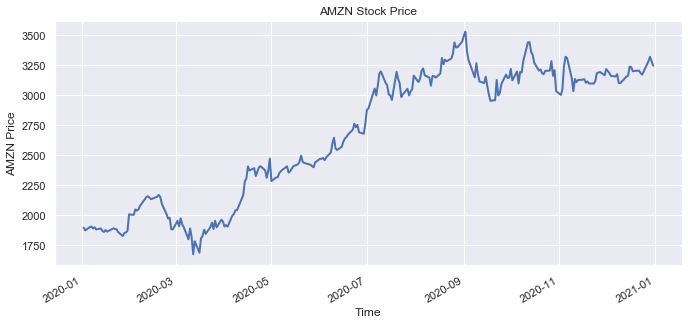

In [4]:
df['Adj Close'].plot(lw=2, figsize = (10,5), title = 'AMZN Stock Price').set(xlabel='Time',ylabel='AMZN Price')

In [5]:
OBV = []
OBV.append(0)

for i in range(1,len(df['Adj Close'])):
    if df['Adj Close'][i]>df['Adj Close'][i-1]:
        OBV.append(OBV[-1] + df['Volume'][i])
    elif df['Adj Close'][i]< df['Adj Close'][i-1]:
        OBV.append(OBV[-1] - df['Volume'][i])
    else:
        OBV.append(OBV[-1])
        

In [6]:
df['OBV'] = OBV
df['OBV_EMA'] = df['OBV'].ewm(span=20).mean()
df

,High,Low,Open,Close,Volume,Adj Close,OBV,OBV_EMA
Date,,,,,,,,
2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000,1898.010010,0,0.000000e+00
2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400,1874.969971,-3764400,-1.976310e+06
2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800,1902.880005,297400,-1.141417e+06
2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900,1906.859985,4342300,4.416471e+05
2020-01-08,1911.000000,1886.439941,1898.040039,1891.969971,3508000,1891.969971,834300,5.366265e+05
...,...,...,...,...,...,...,...,...
2020-12-24,3202.000000,3169.000000,3193.899902,3172.689941,1451900,3172.689941,107454400,1.082263e+08
2020-12-28,3304.000000,3172.689941,3194.000000,3283.959961,5686800,3283.959961,113141200,1.086944e+08
2020-12-29,3350.649902,3281.219971,3309.939941,3322.000000,4872900,3322.000000,118014100,1.095820e+08


[Text(0, 0.5, 'AMZN Price'), Text(0.5, 0, 'Time')]

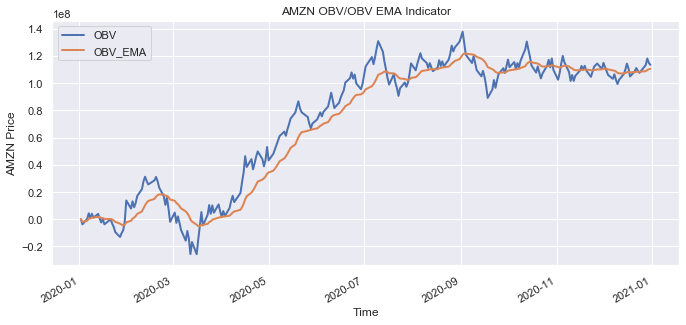

In [7]:
df.loc[:,['OBV','OBV_EMA']].plot(lw=2, figsize = (10,5), title = 'AMZN OBV/OBV EMA Indicator').set(xlabel='Time',ylabel='AMZN Price')

In [23]:
# Buy when OBV goes above OBV EMA 
# Sell when OBV EMA goes above OBV
def buy_sell(signal, col1, col2):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    
    for i in range(0,len(signal)):
        if signal[col1][i] > signal[col2][i] and flag != 1:
            sigPriceBuy.append(signal['Adj Close'][i])
            sigPriceSell.append(np.nan)
            flag = 1
        elif signal[col1][i] < signal[col2][i] and flag != 0:
            sigPriceSell.append(signal['Adj Close'][i])
            sigPriceBuy.append(np.nan)
            flag = 0
        else:
            sigPriceSell.append(np.nan)
            sigPriceBuy.append(np.nan)
    return(sigPriceSell,sigPriceBuy)

In [24]:
x = buy_sell(df,'OBV','OBV_EMA')
df['Buy_Signal_Price'] = x[0]
df['Sell_Signal_Price'] = x[1]

In [25]:
df

,High,Low,Open,Close,Volume,Adj Close,OBV,OBV_EMA,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000,1898.010010,0,0.000000e+00,NaN,NaN
2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400,1874.969971,-3764400,-1.976310e+06,1874.969971,NaN
2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800,1902.880005,297400,-1.141417e+06,NaN,1902.880005
2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900,1906.859985,4342300,4.416471e+05,NaN,NaN
2020-01-08,1911.000000,1886.439941,1898.040039,1891.969971,3508000,1891.969971,834300,5.366265e+05,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,3202.000000,3169.000000,3193.899902,3172.689941,1451900,3172.689941,107454400,1.082263e+08,3172.689941,NaN
2020-12-28,3304.000000,3172.689941,3194.000000,3283.959961,5686800,3283.959961,113141200,1.086944e+08,NaN,3283.959961
2020-12-29,3350.649902,3281.219971,3309.939941,3322.000000,4872900,3322.000000,118014100,1.095820e+08,NaN,NaN


C:\Users\idhru\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


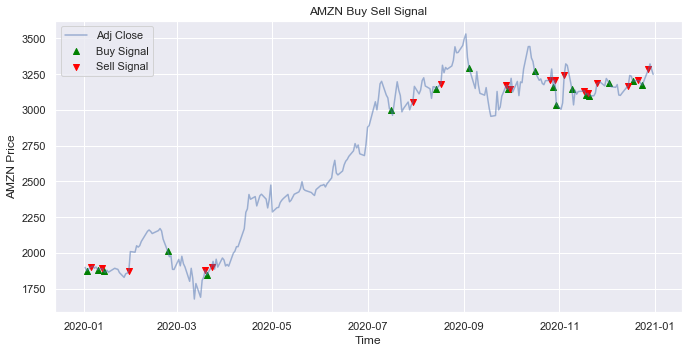

In [26]:
plt.figure(figsize = (10,5))
plt.plot(df.index,df['Adj Close'], label = 'Adj Close',alpha =0.5)
plt.scatter(df.index, df['Buy_Signal_Price'], label = 'Buy Signal', marker = '^',alpha =1,color='green')
plt.scatter(df.index, df['Sell_Signal_Price'], label = 'Sell Signal', marker = 'v',alpha =1, color = 'red')
plt.title('AMZN Buy Sell Signal')
plt.xlabel('Time')
plt.ylabel('AMZN Price')
plt.legend(loc = 'upperleft')
plt.show()

In [31]:
PNL = df['Sell_Signal_Price'].sum() - df['Buy_Signal_Price'].sum()
PNL

306.23046875